Scipy:
We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.
Task:
1. fitting it to the periodic function
2. plot the fit

Data
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

Text(0,0.5,'Temperature (*C)')

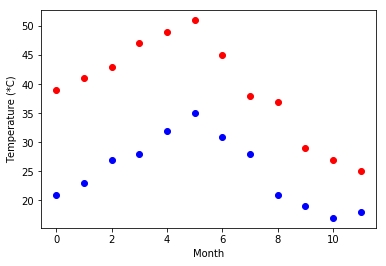

In [30]:
tmax = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
tmin = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
months = np.arange(12)

plt.plot(months, tmax, 'ro')
plt.plot(months, tmin, 'bo')
plt.xlabel('Month')
plt.ylabel('Temperature (*C)')

In [31]:
#Periodic fun fitting temperature
def periodic_fun(d, a, b, c):
    return (a + b * np.cos((d + c) * 2 * np.pi / d.max()))

res_max, cov_max = curve_fit(periodic_fun, months, tmax)
res_min, cov_min = curve_fit(periodic_fun, months, tmin)

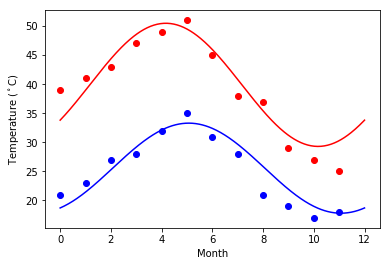

In [28]:
#Plot curve fitting for max & min temperature 
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, tmax, 'ro')
plt.plot(days, periodic_fun(days, *res_max), 'r-')
plt.plot(months, tmin, 'bo')
plt.plot(days, periodic_fun(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

Matplotlib:
This assignment is for visualization using matplotlib:
data to use:
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
titanic = pd.read_csv(url)
Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [33]:
titanic = pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv")
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [43]:
type(titanic['sex'])

pandas.core.series.Series

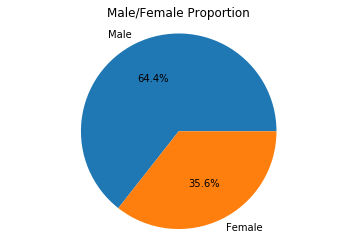

In [51]:
series=titanic['sex'].value_counts()
my_labels = 'Male', 'Female'
plt.pie(series,labels=my_labels,autopct='%1.1f%%')
plt.title('Male/Female Proportion')
plt.axis('equal')
plt.show()

Text(0.5,1,'Fair paid by different Age Male & Female')

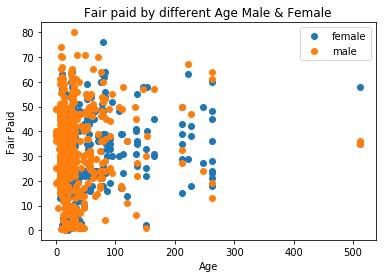

In [87]:
groups = titanic.groupby("sex")
for gender, group in groups:
    plt.plot(group["fare"], group["age"], marker="o", linestyle="", label=gender)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Fair Paid')
plt.title('Fair paid by different Age Male & Female')